In [1]:
import numpy as np
import pandas as pd
import pathlib as pl
from datetime import datetime
import matplotlib.pyplot as plot
from pandas import DataFrame, Series
import seaborn as sb
# read .xlsx files under ./data directory into datatables.

In [2]:
datapath=pl.Path("/home/techstar/data/pyprojects/SHDK_828/6-8月数据")

In [3]:
# read from csv files

#datapath=pl.Path("./6-8月数据")

file_list=[]
dfs=[]
for x in datapath.glob("*.csv"):
    if x.name.find("HaiLu")==-1:
        print("Reading "+x.name)
        f=pd.read_csv(x,index_col=0,na_values=" ")
        dfs.append(f)
        file_list.append(x.name)

Reading ChangLiu3.csv
Reading ChangLiu2.csv
Reading WanKe1.csv
Reading WanKe2.csv
Reading ChangLiu4.csv
Reading ChangLiu1.csv


In [4]:
datapath=pl.Path("/home/techstar/data/pyprojects/SHDK_828/数据导出/数据导出")

In [5]:
file_list

['ChangLiu3.csv',
 'ChangLiu2.csv',
 'WanKe1.csv',
 'WanKe2.csv',
 'ChangLiu4.csv',
 'ChangLiu1.csv']

In [6]:
# read from csv files

#datapath=pl.Path("./data_Jun_Aug")

for x in datapath.glob("*-V.csv"):
    print("Reading "+x.name)
    f=pd.read_csv(x,index_col=0,na_values=" ")
    dfs.append(f)
    file_list.append(x.name)

Reading jiangchuan1-V.csv
Reading jiangchuan3-V.csv
Reading jiangchuan5-V.csv
Reading QinZhou3-V.csv
Reading jiangchuan2-V.csv
Reading QinZhou4-V.csv
Reading KunYang3-V.csv
Reading KunYang1-V.csv
Reading jiangchuan4-V.csv


In [7]:
cols = ["Avg[V 有效值 AB]",
# "Avg[V 总谐波畸变率 A]",
 "Avg[V 负序不平衡 Total]",
 "Avg[V SPOS All]",
 "Avg[V SNEG All]",
 "Avg[V SZERO All]",
#"Pst A",
 "Avg[I 有效值 A]",
 "Avg[I 总谐波畸变率 A]",
 "Avg[I 负序不平衡 Total]",
 "Avg[I SPOS All]",
 "Avg[I SNEG All]",
 "Avg[I ZERO All]",
# "Avg[P A]",
# "Avg[Q A]",
# "Avg[S A]",
# "Avg[功率因数 A]"
 ]

In [18]:
tr_data=DataFrame()
i=0
for df in dfs:
    for c in df.columns:
        if c.find("Avg[V 有效值 A]")!=-1:
            print (c)
            tr_data[c]=df[c]
            i+=1
print(i)
           

 Changliu3 - Avg[V 有效值 A] (V)
 Changliu2 - Avg[V 有效值 A] (V)
 WanKe1 - Avg[V 有效值 A] (V)
 WanKe2 - Avg[V 有效值 A] (V)
 Changliu4 - Avg[V 有效值 A] (V)
 Changliu1 - Avg[V 有效值 A] (V)
 JiangChuan1 - Avg[V 有效值 A] (%)
 JiangChuan3 - Avg[V 有效值 A] (%)
 JiangChuan5 - Avg[V 有效值 A] (%)
 QinZhou3 - Avg[V 有效值 A] (%)
 JiangChuan2 - Avg[V 有效值 A] (%)
 QinZhou4 - Avg[V 有效值 A] (%)
 KunYang3 - Avg[V 有效值 A] (%)
 KunYang1 - Avg[V 有效值 A] (%)
 JiangChuan4 - Avg[V 有效值 A] (%)
15


In [69]:
train_data=tr_data.copy()
train_data.index = pd.to_datetime(train_data.index)

In [70]:
train_data = train_data[train_data[' KunYang3 - Avg[V 有效值 A] (%)']<110]
train_data = train_data[train_data[' JiangChuan1 - Avg[V 有效值 A] (%)']>90]

In [71]:
tran_dict={' JiangChuan1 - Avg[V 有效值 A] (%)':1100/np.sqrt(3),
           ' JiangChuan2 - Avg[V 有效值 A] (%)':1100/np.sqrt(3),
           ' JiangChuan3 - Avg[V 有效值 A] (%)':1100/np.sqrt(3),
           ' JiangChuan4 - Avg[V 有效值 A] (%)':350/np.sqrt(3),
           ' JiangChuan5 - Avg[V 有效值 A] (%)':350/np.sqrt(3),
           ' KunYang1 - Avg[V 有效值 A] (%)':350/np.sqrt(3),
           ' KunYang3 - Avg[V 有效值 A] (%)':100/np.sqrt(3),
           ' QinZhou3 - Avg[V 有效值 A] (%)':100/np.sqrt(3),
           ' QinZhou4 - Avg[V 有效值 A] (%)':100/np.sqrt(3),
           }

In [72]:
# this cell is for translating the %  value in some station to V value
train_data[' WanKe1 - Avg[V 有效值 A] (V)']=train_data[' WanKe1 - Avg[V 有效值 A] (V)']*100/np.sqrt(3)
for col in train_data.columns:
    if col.find("(%)")!=-1:
        train_data[col]=train_data[col]*tran_dict[col]
              

In [73]:
train_data=train_data.dropna()
len(train_data)

31288

In [74]:
train_data = train_data.reindex(columns =train_data.columns.sort_values())


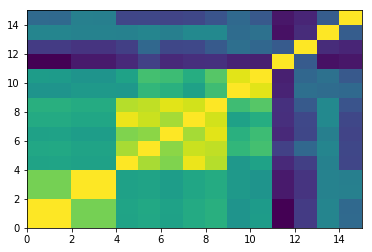

In [75]:
corMat=DataFrame(train_data.corr())
plot.pcolor(corMat)
plot.show()

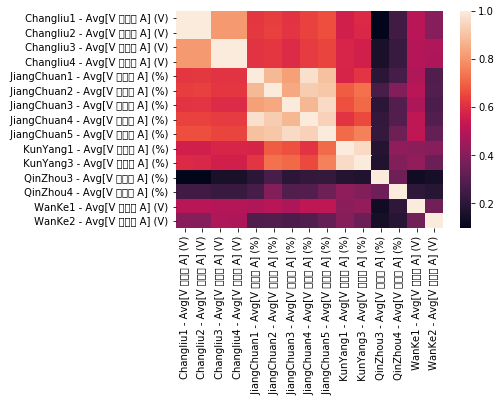

In [76]:
sb.heatmap(corMat)
plot.show()

In [77]:
train_data.describe()

,Changliu1 - Avg[V 有效值 A] (V),Changliu2 - Avg[V 有效值 A] (V),Changliu3 - Avg[V 有效值 A] (V),Changliu4 - Avg[V 有效值 A] (V),JiangChuan1 - Avg[V 有效值 A] (%),JiangChuan2 - Avg[V 有效值 A] (%),JiangChuan3 - Avg[V 有效值 A] (%),JiangChuan4 - Avg[V 有效值 A] (%),JiangChuan5 - Avg[V 有效值 A] (%),KunYang1 - Avg[V 有效值 A] (%),KunYang3 - Avg[V 有效值 A] (%),QinZhou3 - Avg[V 有效值 A] (%),QinZhou4 - Avg[V 有效值 A] (%),WanKe1 - Avg[V 有效值 A] (V),WanKe2 - Avg[V 有效值 A] (V)
count,31288.000000,31288.000000,31288.000000,31288.000000,31288.000000,31288.000000,31288.000000,31288.000000,31288.000000,31288.000000,31288.000000,31288.000000,31288.000000,31288.000000,31288.000000
mean,66433.236811,66405.437582,66272.079880,66279.307625,65769.336584,66035.206361,64280.859130,21214.923915,20953.411826,20909.416242,5974.550251,6081.770759,6045.011877,5366.054787,5971.006912
std,530.983980,530.991313,610.464086,610.789688,588.076021,499.028631,823.196128,191.970767,230.436928,226.090847,67.409451,42.544096,69.143387,58.050206,68.959682
min,65138.785156,65110.730469,64784.941406,64791.621094,58651.140635,64091.945323,61840.878917,20652.878928,20274.199240,15413.943359,4583.943353,5935.601066,5874.333000,5152.702710,5797.876465
25%,66022.794922,65995.203125,65825.205078,65832.281250,65336.592785,65723.539074,63697.197277,21071.489769,20795.207054,20737.130371,5924.992301,6049.747550,5992.151969,5324.431070,5921.161011
50%,66430.601562,66402.601562,66314.660156,66322.105469,65766.023449,66047.386730,64295.875011,21213.961937,20961.266624,20919.553711,5977.981437,6086.140861,6049.591544,5363.976339,5970.583496
75%,66876.322266,66848.033203,66782.732422,66790.277344,66196.146496,66405.855480,64903.783214,21360.663109,21136.742210,21088.183594,6027.751578,6113.562613,6099.159293,5406.512160,6027.843018
max,68190.742188,68161.250000,67534.031250,67542.132812,67527.507824,67399.992199,67347.367199,21741.841820,21534.361351,21429.019531,6134.883292,6263.957511,6198.285636,5530.809609,6117.668945


In [91]:
#from sklearn.model_selection import train_test_split
#train,test= train_test_split(train_data,test_size=0.2,random_state=0)
#train_data = train_data['2017-6-15':'2017-6-23']
train = train_data[:25000]
test  = train_data[25000:]

In [92]:
MAX= train.max()
MIN = train.min()

In [93]:
train_s=(train-MIN)/(MAX-MIN)
test_s=(test-MIN)/(MAX-MIN)

In [99]:
#  generate X_train,Y_train,X_test,Y_test for all target features
X_train=train_s.copy();Y_train=DataFrame()

for c in train_s.columns:
    if c.find("WanKe1") !=-1 :
        Y_train[c]=train_s[c]
        X_train=X_train.drop(c,axis=1)

        
X_test=test_s.copy();Y_test=DataFrame()

for c in test_s.columns:
    if c.find("WanKe1") !=-1 :
        Y_test[c]=test_s[c]
        X_test=X_test.drop(c,axis=1)

In [100]:
###### network from keras for SHDKY data simulation ###########
from keras.models import Sequential
from keras.layers import Dense, Activation,Input
import keras


model = Sequential()

model.add(Dense(2048, input_dim=14,kernel_initializer="normal"))
model.add(Activation('relu'))
model.add(Dense(7, activation='relu',kernel_initializer="normal"))
model.add(Dense(1, activation='linear',kernel_initializer="normal")) 


In [101]:
#model.compile(loss='mean_squared_error', 
#              optimizer=keras.optimizers.SGD(lr=0.2))
model.compile(loss='mean_squared_error', 
              optimizer='adam')

In [103]:
model.fit(X_train, Y_train, epochs=30,batch_size=50,
          shuffle=True,verbose=2,validation_split=0.2)  

Train on 20000 samples, validate on 5000 samples
Epoch 1/30
 - 1s - loss: 0.0145 - val_loss: 0.0194
Epoch 2/30
 - 1s - loss: 0.0141 - val_loss: 0.0193
Epoch 3/30
 - 1s - loss: 0.0139 - val_loss: 0.0211
Epoch 4/30
 - 1s - loss: 0.0137 - val_loss: 0.0207
Epoch 5/30
 - 1s - loss: 0.0135 - val_loss: 0.0205
Epoch 6/30
 - 1s - loss: 0.0133 - val_loss: 0.0200
Epoch 7/30
 - 1s - loss: 0.0131 - val_loss: 0.0197
Epoch 8/30
 - 1s - loss: 0.0128 - val_loss: 0.0206
Epoch 9/30
 - 1s - loss: 0.0125 - val_loss: 0.0204
Epoch 10/30
 - 1s - loss: 0.0121 - val_loss: 0.0218
Epoch 11/30
 - 1s - loss: 0.0117 - val_loss: 0.0215
Epoch 12/30
 - 1s - loss: 0.0115 - val_loss: 0.0207
Epoch 13/30
 - 1s - loss: 0.0112 - val_loss: 0.0201
Epoch 14/30
 - 1s - loss: 0.0111 - val_loss: 0.0200
Epoch 15/30
 - 1s - loss: 0.0108 - val_loss: 0.0210
Epoch 16/30
 - 1s - loss: 0.0107 - val_loss: 0.0200
Epoch 17/30
 - 1s - loss: 0.0105 - val_loss: 0.0208
Epoch 18/30
 - 1s - loss: 0.0104 - val_loss: 0.0202
Epoch 19/30
 - 1s - loss

In [49]:
(model.predict(X_test)-Y_test)/Y_test

,WanKe1 - Avg[V 有效值 AB] (V)
时间,
2017-06-06 00:15:00,-0.071295
2017-06-26 20:15:00,-1.543686
2017-06-21 21:45:00,-0.014884
2017-06-04 10:45:00,-1.493933
2017-06-09 07:00:00,-2.434166
2017-06-01 08:30:00,-0.341035
2017-06-05 15:00:00,-0.467598
2017-06-27 06:15:00,0.099491
2017-06-19 04:00:00,-0.145898


In [15]:
Y_train

,Changliu3 - Avg[V 有效值 A] (V)
时间,
2017-06-21 03:39:00,1.242976
2017-08-09 14:00:00,-1.581354
2017-08-01 04:51:00,0.896351
2017-07-17 17:06:00,-0.402780
2017-08-31 14:12:00,-0.570351
2017-06-29 18:51:00,-0.214738
2017-07-11 00:57:00,0.930508
2017-06-04 09:24:00,-0.299067
2017-07-19 19:45:00,-1.199888


In [14]:
M

 Changliu3 - Avg[V 有效值 A] (V)      66239.215310
 Changliu2 - Avg[V 有效值 A] (V)      66385.198319
 WanKe1 - Avg[V 有效值 A] (V)            92.993566
 WanKe2 - Avg[V 有效值 A] (V)          5967.349035
 Changliu4 - Avg[V 有效值 A] (V)      66246.276386
 Changliu1 - Avg[V 有效值 A] (V)      66413.393866
 KunYang3 - Avg[V 有效值 A] (V)        9898.420824
 JiangChuan3 - Avg[V 有效值 A] (V)    64202.018849
 KunYang1 - Avg[V 有效值 A] (V)       20914.002418
dtype: float64

In [15]:
Std

 Changliu3 - Avg[V 有效值 A] (V)       617.089011
 Changliu2 - Avg[V 有效值 A] (V)       527.710888
 WanKe1 - Avg[V 有效值 A] (V)            0.986196
 WanKe2 - Avg[V 有效值 A] (V)           69.208721
 Changliu4 - Avg[V 有效值 A] (V)       617.415263
 Changliu1 - Avg[V 有效值 A] (V)       527.783519
 KunYang3 - Avg[V 有效值 A] (V)       6578.474288
 JiangChuan3 - Avg[V 有效值 A] (V)     810.844800
 KunYang1 - Avg[V 有效值 A] (V)        233.289743
dtype: float64

In [16]:
train.max()

 Changliu3 - Avg[V 有效值 A] (V)      67534.031250
 Changliu2 - Avg[V 有效值 A] (V)      68145.773438
 WanKe1 - Avg[V 有效值 A] (V)            95.808167
 WanKe2 - Avg[V 有效值 A] (V)          6113.998535
 Changliu4 - Avg[V 有效值 A] (V)      67542.132812
 Changliu1 - Avg[V 有效值 A] (V)      68175.429688
 KunYang3 - Avg[V 有效值 A] (V)       21404.712891
 JiangChuan3 - Avg[V 有效值 A] (V)    67347.367188
 KunYang1 - Avg[V 有效值 A] (V)       21429.019531
dtype: float64

In [17]:
train.min()

 Changliu3 - Avg[V 有效值 A] (V)      64784.941406
 Changliu2 - Avg[V 有效值 A] (V)      65110.730469
 WanKe1 - Avg[V 有效值 A] (V)            89.247429
 WanKe2 - Avg[V 有效值 A] (V)          5797.876465
 Changliu4 - Avg[V 有效值 A] (V)      64791.621094
 Changliu1 - Avg[V 有效值 A] (V)      65138.785156
 KunYang3 - Avg[V 有效值 A] (V)        4583.943359
 JiangChuan3 - Avg[V 有效值 A] (V)    61840.878906
 KunYang1 - Avg[V 有效值 A] (V)       14768.707031
dtype: float64

In [18]:
train.median()

 Changliu3 - Avg[V 有效值 A] (V)      66268.335938
 Changliu2 - Avg[V 有效值 A] (V)      66386.093750
 WanKe1 - Avg[V 有效值 A] (V)            92.938095
 WanKe2 - Avg[V 有效值 A] (V)          5964.761230
 Changliu4 - Avg[V 有效值 A] (V)      66275.476562
 Changliu1 - Avg[V 有效值 A] (V)      66414.250000
 KunYang3 - Avg[V 有效值 A] (V)        6013.958008
 JiangChuan3 - Avg[V 有效值 A] (V)    64203.542969
 KunYang1 - Avg[V 有效值 A] (V)       20923.894531
dtype: float64